<a href="https://colab.research.google.com/github/ananyatrivedi1/PyTorch/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Classification
2. Object Detection
3. Segmentation (computational photography)

### Convolutional Neural Network (CNN)

1. Input Layer
2. Convolution Layer
3. Hidden/activation
4. Pooling Layer
5. Output layer

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

FashionMNIST Dataset -> grey scale images of pices of clothing
MNIST dataset -> handwritten numbers (postal codes for courier service)

In [ ]:
test_data = datasets.FashionMNIST(
   root="test_data",
   train=False,
   transform=torchvision.transforms.ToTensor(),
   target_transform=None,
   download=True
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.24MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]


In [ ]:
# @title
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 344kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.14MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.7MB/s]


Check the first sample for image and label

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

Check classes with `.classes`

In [ ]:
label_classes = train_data.classes
label_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

Map to index using `.class_to_idx`

Try targets

In [ ]:
#image.shape, label.shape
label_classes[label]

'Ankle boot'

Only one colour chanel in this case

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

Image shape: torch.Size([1, 28, 28])


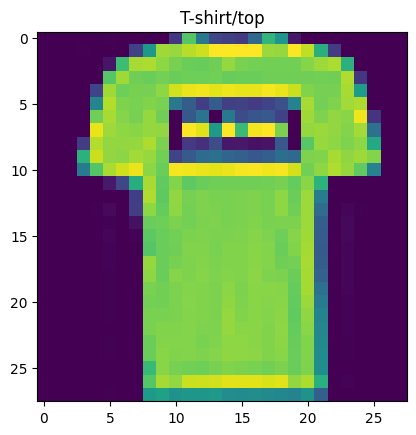

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # try without squeeze first
plt.title(label_classes[label]);

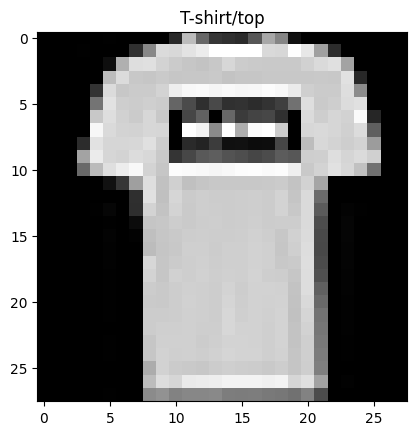

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label_classes[label]);

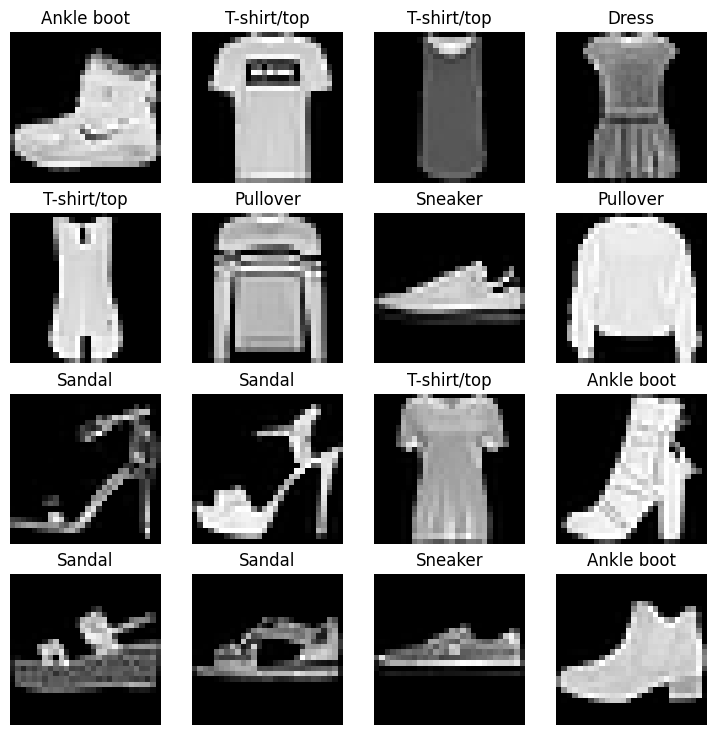

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    #random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[i-1]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label_classes[label])
    plt.axis(False);

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Prepare Dataloader

We essentially wanna batch-ify our train and test data

In [ ]:
60000/32

1875.0

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# train_dataloader = DataLoader(...)

In [ ]:
# @title
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

In [ ]:
# Check the length of the dataloaders

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# check both of their shapes
train_labels_batch.shape

torch.Size([32])

### Building a Baseline Model

Start with a simple base model and then build up (to avoid overfitting)

In [ ]:
# @title
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [47]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(label_classes)
)

In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

#### Evaluation Metrics

In [ ]:
def accuracy_fn(predictions, truevals):
  corr = torch.eq(predictions, truevals).sum().item()
  return (corr/len(truevals))*100

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [50]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):

        model_0.train()

        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 34.491 seconds


#### Testing the model

In [51]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred.argmax(dim=1),y)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': FashionMNISTModelV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Building a better model

Building a better model with Linear and Relu Layers

In [39]:
# @title
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [40]:
# Create instance of the new model, keep same inputs
torch.manual_seed(42)

model_1 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(label_classes)
)

In [42]:
# Set up Cross Entropy Loss and SGD optimizer
M1loss_fn = nn.CrossEntropyLoss()
M1optimixer = torch.optim.SGD(model_1.parameters(), lr=0.1)

### Functionizing the train and test steps

In [43]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss} | Train accuracy: {train_acc}")


In [44]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss} | Test accuracy: {test_acc}%\n")

## Dataloader

In [52]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

In [53]:
train_batch_features, train_batch_label = next(iter(train_dataloader))
img, lbl = train_batch_features[0], train_batch_label[0]

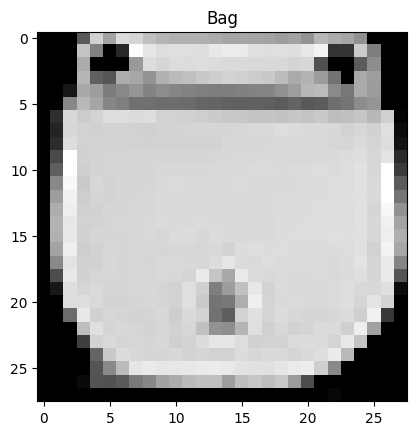

In [54]:
img, lbl
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label_classes[lbl]);


In [56]:
# Flatten, Linear, Linear
class FashionModel0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack1(x)


In [69]:
model_0 = FashionModel0(784, 8, len(label_classes))
model_0

FashionModel0(
  (layer_stack1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [80]:
loss_fn = nn.CrossEntropyLoss()
M0_optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [59]:
def accuracy_fn(predictions, trueVals):
  corr = torch.eq(predictions, trueVals).sum().item()
  return ((corr/len(trueVals)) * 100)

1. Loop through the epochs
2. Loop through the samples and calculate loss per epoch (train, test)

Train: In 1 epoch -> 1875 gradient updates
Test: In 1 epoch -> 313 gradient updates

In [60]:
len(train_dataloader)

1875

In [81]:
from tqdm import tqdm

torch.manual_seed(42)
epochs = 3
BATCH_SIZE=32
train_loss = 0
acc = 0
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-----")

    model_0.train()
    for batch, (X, y) in enumerate(train_dataloader):
        #print(f"Batch {batch}")
        train_preds = model_0(X)
        loss = loss_fn(train_preds, y)
        acc += accuracy_fn(train_preds.argmax(dim=1), y)

        M0_optimizer.zero_grad()
        loss.backward()
        train_loss += loss
        optimizer.step()
        if batch % 300 == 0:
            print(f"Went through {batch * BATCH_SIZE}/ {len(train_dataloader.dataset)} samples" )

    train_loss /= len(train_dataloader)
    acc /= len(train_dataloader)

    model_0.eval()

    test_loss=0
    test_acc=0
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_preds = model_0(X)
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(test_preds.argmax(dim=1), y)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


 33%|███▎      | 1/3 [00:12<00:25, 13.00s/it]

Epoch: 1 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


 67%|██████▋   | 2/3 [00:24<00:11, 11.96s/it]

Epoch: 2 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


100%|██████████| 3/3 [00:35<00:00, 11.75s/it]


Model name, test loss, test accuracy

In [72]:
def evalModel(model, data_loader, loss_fn, accuracy_fn):
    model.eval()
    test_loss=0
    test_acc=0
    with torch.inference_mode():
        for X, y in data_loader:
            test_preds = model(X)
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(test_preds.argmax(dim=1), y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    return {"Model": model ,
            "Test Loss": test_loss.item(),
            "Test Acc": test_acc}

In [75]:
model_0_results = evalModel(model_0, test_dataloader, M0_loss_fn, accuracy_fn)
print(model_0_results)

{'Model': FashionModel0(
  (layer_stack1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
), 'Test Loss': 2.3395681381225586, 'Test Acc': 12.949281150159745}


In [78]:
# Flatten, Linear, Linear
class FashionModel1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack2 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack2(x)

In [79]:
model1 = FashionModel1(784, 8, len(label_classes))
M1_optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [82]:
from tqdm import tqdm

torch.manual_seed(42)
epochs = 3
BATCH_SIZE=32
train_loss = 0
acc = 0
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-----")

    model1.train()
    for batch, (X, y) in enumerate(train_dataloader):
        #print(f"Batch {batch}")
        train_preds = model1(X)
        loss = loss_fn(train_preds, y)
        acc += accuracy_fn(train_preds.argmax(dim=1), y)

        optimizer.zero_grad()
        loss.backward()
        train_loss += loss
        optimizer.step()
        if batch % 300 == 0:
            #print(f"prediction: {train_preds.argmax(dim=1)} | true: {y}")
            print(f"Went through {batch * BATCH_SIZE}/ {len(train_dataloader.dataset)} samples" )

    train_loss /= len(train_dataloader)
    acc /= len(train_dataloader)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


 33%|███▎      | 1/3 [00:09<00:19,  9.94s/it]

Epoch: 1 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


 67%|██████▋   | 2/3 [00:19<00:09,  9.85s/it]

Epoch: 2 
-----
Went through 0/ 60000 samples
Went through 9600/ 60000 samples
Went through 19200/ 60000 samples
Went through 28800/ 60000 samples
Went through 38400/ 60000 samples
Went through 48000/ 60000 samples
Went through 57600/ 60000 samples


100%|██████████| 3/3 [00:29<00:00,  9.82s/it]


In [83]:
model1_results = evalModel(model1, test_dataloader, loss_fn, accuracy_fn)
print(model1_results)

{'Model': FashionModel1(
  (layer_stack2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
), 'Test Loss': 2.3099403381347656, 'Test Acc': 10.033945686900958}


In [84]:
images = torch.randn(32, 3, 64, 64)
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

## Convolutional Neural Networks

In [96]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

In [99]:
images = torch.randn(32, 3, 64, 64)
test_image = images[0]
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [100]:
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [119]:
class TinyVGGModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.convBlock1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.convBlock2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.convBlock1(x)
        #print(x.shape)
        x = self.convBlock2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [120]:
vggModel1 = TinyVGGModel(input_shape=1, hidden_units=10, output_shape=10)
vggModel1

TinyVGGModel(
  (convBlock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [109]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

In [121]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [124]:
vggOptimizer = torch.optim.SGD(vggModel1.parameters(), lr=0.1)

In [126]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=vggModel1,
        loss_fn=loss_fn,
        optimizer=vggOptimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=vggModel1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.6838316321372986 | Train accuracy: 75.165


 33%|███▎      | 1/3 [00:52<01:44, 52.06s/it]

Test loss: 0.39122846722602844 | Test accuracy: 86.15215654952077%

Epoch: 1
---------
Train loss: 0.3601713478565216 | Train accuracy: 86.99833333333333


 67%|██████▋   | 2/3 [01:49<00:55, 55.04s/it]

Test loss: 0.34789028763771057 | Test accuracy: 87.38019169329074%

Epoch: 2
---------
Train loss: 0.3243641257286072 | Train accuracy: 88.25333333333333


100%|██████████| 3/3 [02:40<00:00, 53.61s/it]

Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%

Train time on None: 160.845 seconds


In [127]:
model_2_results = eval_model(
    model=vggModel1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': TinyVGGModel(
   (convBlock1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (convBlock2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 'model_loss': 0.3236110210418701,
 'model_acc': 88.40854632587859}

In [ ]:
optimizer = torch.optim.SGD(vggModel1.parameters(), lr=0.1)
vggLoss = nn.CrossEntropyLoss()

In [128]:
epochs = 5
from tqdm.auto import tqdm

for epoch in tqdm(range(epochs)):
    train_step(data_loader=train_dataloader,
        model=vggModel1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,
        model=vggModel1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,)



  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.291480153799057 | Train accuracy: 89.52
Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%

Train loss: 0.2914799451828003 | Train accuracy: 89.52
Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%

Train loss: 0.29148000478744507 | Train accuracy: 89.52
Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%

Train loss: 0.29148003458976746 | Train accuracy: 89.52
Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%

Train loss: 0.2914801239967346 | Train accuracy: 89.52
Test loss: 0.3236110210418701 | Test accuracy: 88.40854632587859%



In [ ]:
vggModel1_results = eval_model(vggModel1, test_dataloader, loss_fn, accuracy_fn)
vggModel1_results

#### Making and evaluating random predictions

Create data by selecting random samples from the test_data of size 9. Create a list of samples, and a list of corresponding labels.

In [148]:
test_data[0]


9

In [133]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5


Functionize making predictions on samples (inference mode). Forward pass on samples to get logits, calculate prediction probabilities using softmax and stack the results.

In [161]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0) # unsqueezing to add the batch dimension
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
    # return pred_probs
    return torch.stack(pred_probs)

Use the `make_predictions()` funtion to predict on the test samples.

In [163]:
pred_probs = make_predictions(vggModel1, test_samples)
pred_probs[:2]

tensor([[1.4109e-07, 3.6590e-10, 9.7771e-10, 4.5011e-09, 2.7544e-09, 9.9992e-01,
         1.3535e-06, 2.8636e-08, 3.1006e-06, 7.6485e-05],
        [1.3885e-01, 6.9767e-01, 3.4006e-03, 6.8652e-02, 5.4351e-02, 2.9392e-04,
         3.6383e-02, 7.8869e-05, 1.0945e-04, 2.1209e-04]])

Convert the prediction probabilities to prediction labels by taking the `argmax`.

In [164]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

If we dont return a stack in the make_predictions function, then we will have to deal with numpy arrays since lists dont have an argmax function.

In [157]:
import numpy as np
pred_classes = np.argmax(pred_probs, axis=1)
pred_classes

array([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [165]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

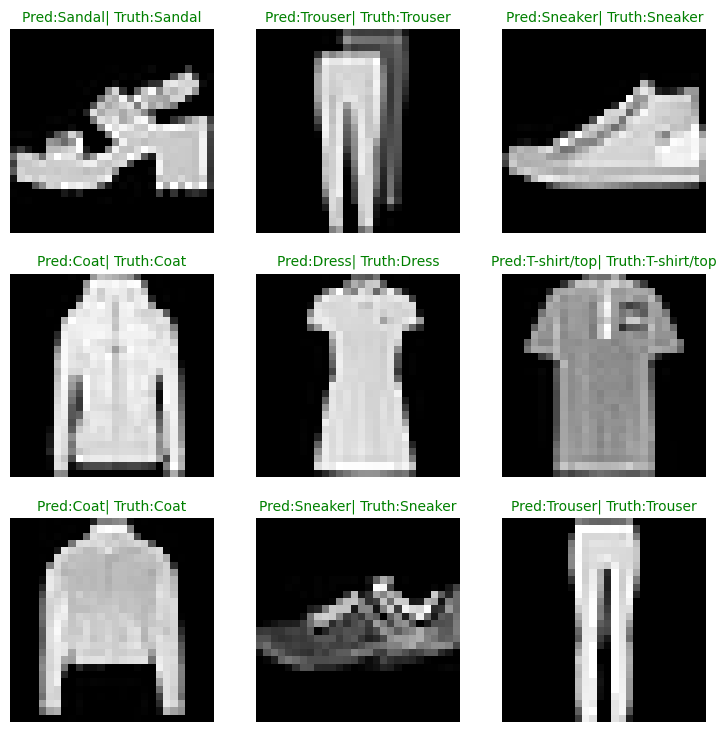

In [166]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = label_classes[pred_classes[i]]
    truth_label = label_classes[test_labels[i]]

    title_text = f"Pred:{pred_label}| Truth:{truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)